<a href="https://colab.research.google.com/github/vikram2727/ML-a-to-z/blob/main/DT_req_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
train = pd.read_excel("/content/sample_data/B.xlsx")
train

,PHIF,SW,VSH,BVW,KLOGH,KLOGV
0,0.211309,0.9650,0.2008,0.203916,76.5077,56.6627
1,0.218761,0.9555,0.1851,0.209027,121.3757,92.4860
2,0.214860,0.9747,0.1969,0.209429,88.5002,66.1353
3,0.213654,0.9068,0.2088,0.193752,67.6057,49.6895
4,0.221133,0.8734,0.2856,0.193148,15.8066,10.6224


In [5]:
#train = train_df.drop(['WELL',	'DEPTH'], axis=1)

In [6]:
train.describe()

,PHIF,SW,VSH,BVW,KLOGH,KLOGV
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.215943,0.935080,0.215440,0.201854,73.959180,55.119180
std,0.003961,0.043261,0.040141,0.007977,38.367799,29.704635
min,0.211309,0.873400,0.185100,0.193148,15.806600,10.622400
25%,0.213654,0.906800,0.196900,0.193752,67.605700,49.689500
50%,0.214860,0.955500,0.200800,0.203916,76.507700,56.662700
75%,0.218761,0.965000,0.208800,0.209027,88.500200,66.135300
max,0.221133,0.974700,0.285600,0.209429,121.375700,92.486000


In [7]:
X = train.iloc[:,:-1].values

In [8]:
X

array([[  0.211309,   0.965   ,   0.2008  ,   0.203916,  76.5077  ],
       [  0.218761,   0.9555  ,   0.1851  ,   0.209027, 121.3757  ],
       [  0.21486 ,   0.9747  ,   0.1969  ,   0.209429,  88.5002  ],
       [  0.213654,   0.9068  ,   0.2088  ,   0.193752,  67.6057  ],
       [  0.221133,   0.8734  ,   0.2856  ,   0.193148,  15.8066  ]])

In [9]:
y = train.iloc[:,-1]

In [10]:
y

0    56.6627
1    92.4860
2    66.1353
3    49.6895
4    10.6224
Name: KLOGV, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (4, 5)
Shape of Training y: (4,)
Shape of Test X: (1, 5)
Shape of Test y: (1,)


In [14]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree

In [15]:
dt_reg = DecisionTreeRegressor(random_state=1234)
model = dt_reg.fit(X,y)

In [16]:
text_representation = tree.export_text(dt_reg)
print(text_representation)

|--- feature_4 <= 41.71
|   |--- value: [10.62]
|--- feature_4 >  41.71
|   |--- feature_2 <= 0.19
|   |   |--- value: [92.49]
|   |--- feature_2 >  0.19
|   |   |--- feature_4 <= 82.50
|   |   |   |--- feature_3 <= 0.20
|   |   |   |   |--- value: [49.69]
|   |   |   |--- feature_3 >  0.20
|   |   |   |   |--- value: [56.66]
|   |   |--- feature_4 >  82.50
|   |   |   |--- value: [66.14]



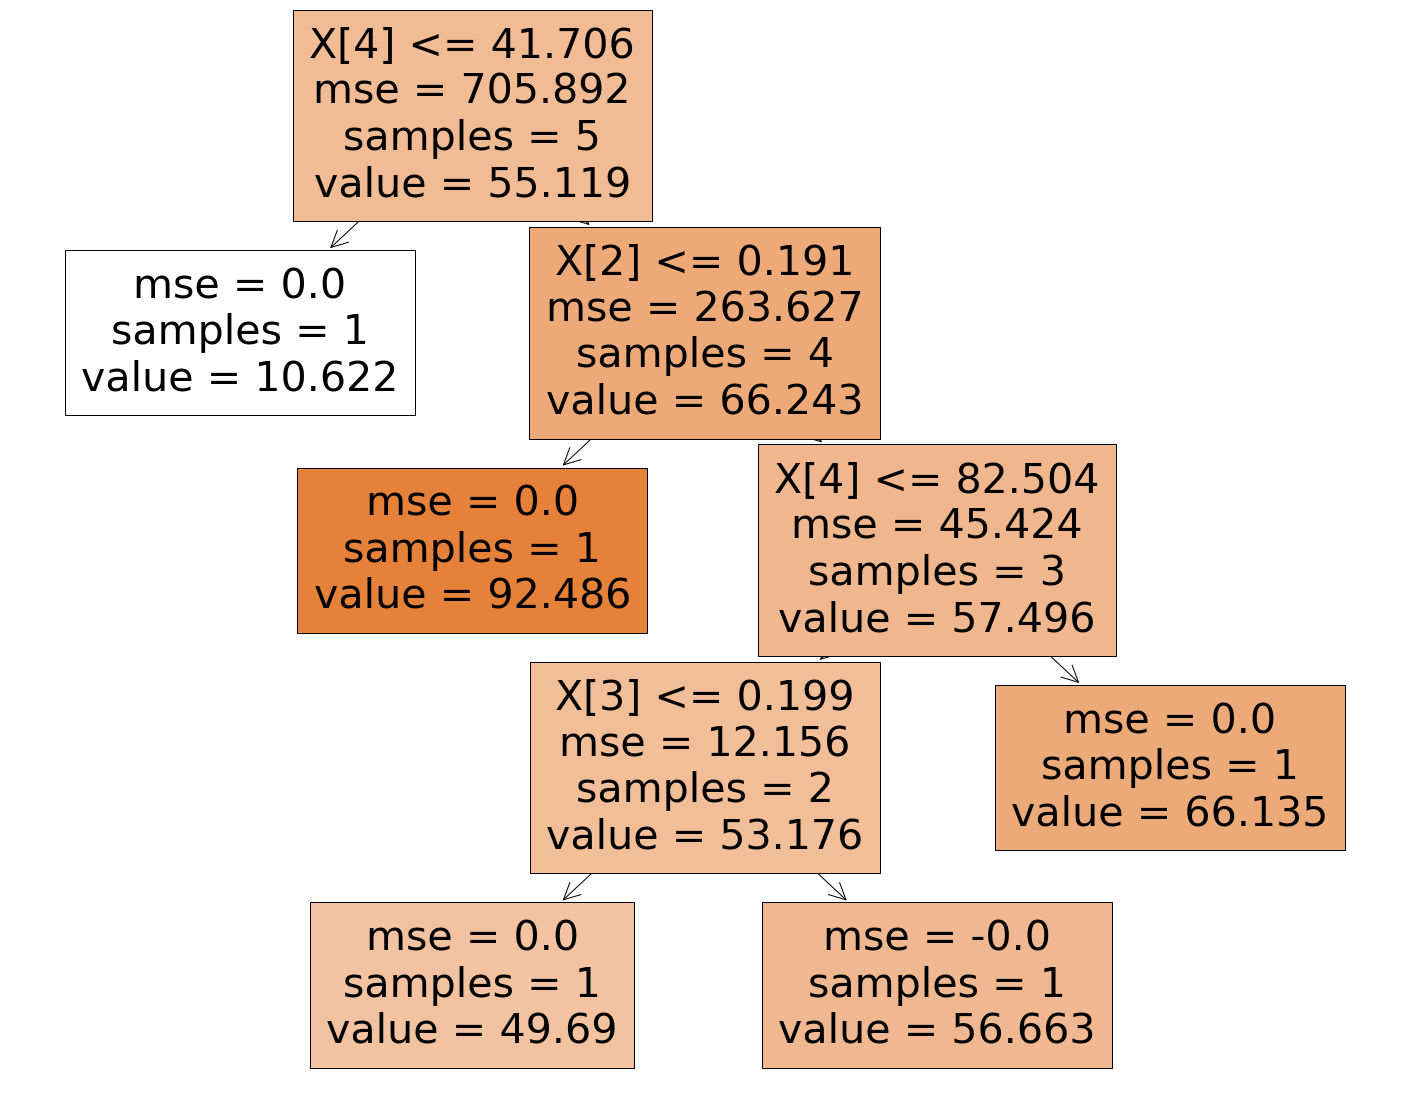

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_reg, 
                   filled=True)

In [18]:
feature_names = ['PHIF',	'SW',	'VSH',	'BVW',	'Kv']

target_names = ['Kh']

In [19]:

kv = pd.DataFrame(X_train, columns = feature_names)

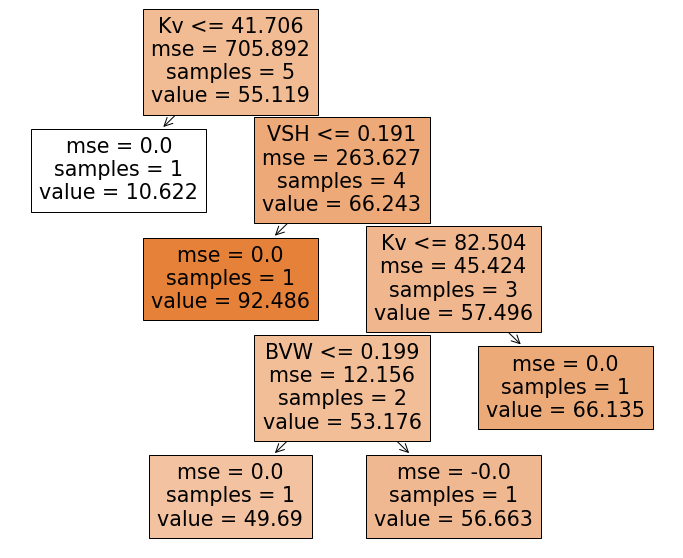

In [20]:
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(dt_reg, feature_names=feature_names, filled=True)

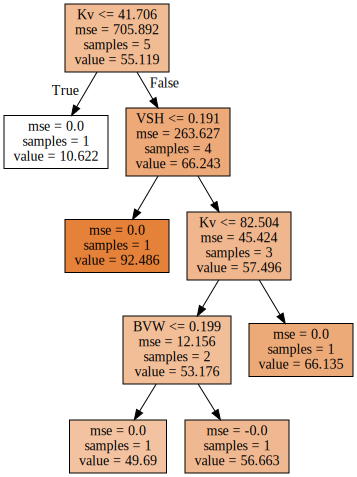

In [21]:
import graphviz
dot_data1 = tree.export_graphviz(dt_reg, out_file=None, 
                                feature_names=feature_names,  
                                filled=True)
graphviz.Source(dot_data1, format="png") 


In [22]:
pip install dtreeviz

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66640 sha256=36dea296f45521a55e102e22f47a076d4e359d2be858f426716e6e5543f6bac2
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


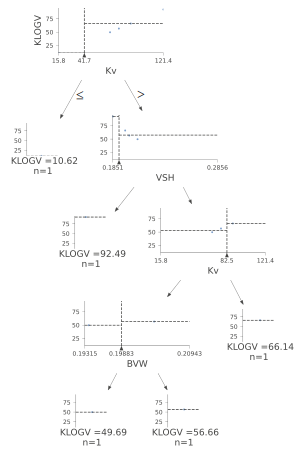

In [23]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt_reg, X, y,
                target_name=" KLOGV ",
                feature_names=feature_names)
viz

In [24]:
# Load packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [25]:
# 4. Random Forest - Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
len(rf_reg.estimators_)

100

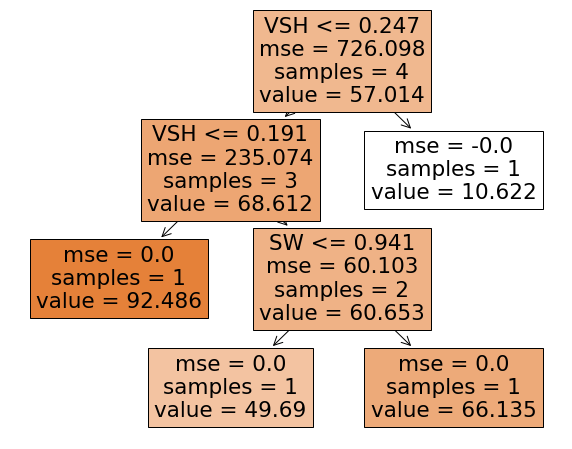

In [27]:
plt.figure(figsize=(10,8))
_ = tree.plot_tree(rf_reg.estimators_[0], feature_names=feature_names, filled=True)

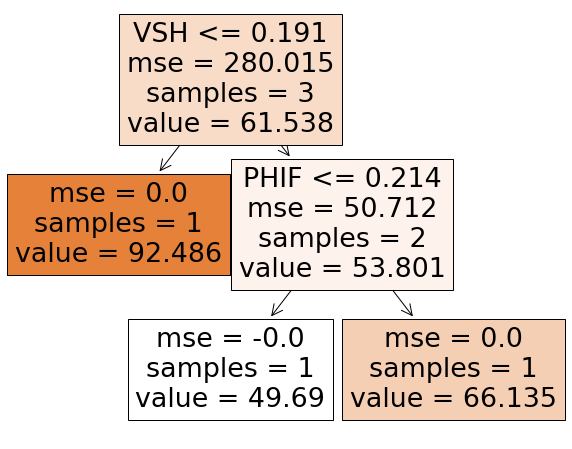

In [28]:
plt.figure(figsize=(10,8))
_ = tree.plot_tree(rf_reg.estimators_[1], feature_names=feature_names, filled=True)

In [29]:
rf_reg.estimators_[0].tree_.max_depth

3

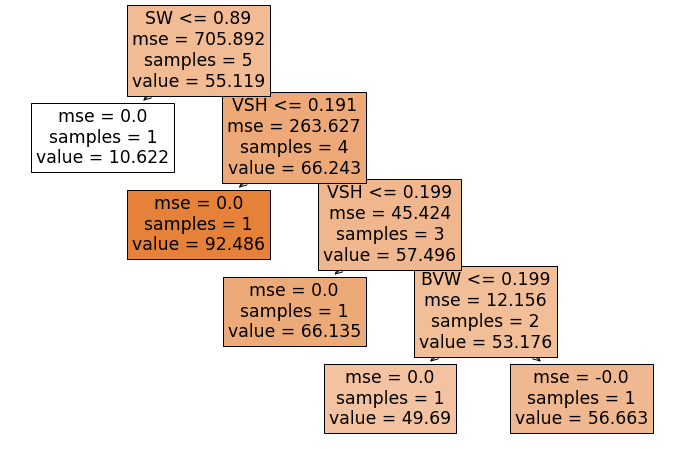

In [30]:
plt.figure(figsize=(12,8))
_ = tree.plot_tree(rf_reg.estimators_[10], feature_names=feature_names, filled=True)

In [31]:
from sklearn.tree import export_graphviz
import pydot

In [32]:
tree = rf_reg.estimators_[5]

In [33]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)

In [34]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [35]:
graph.write_png('tree.png')

# gb

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [37]:
model = GradientBoostingRegressor()
# print(model)

# Fit the regressor to the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(model.estimators_[0], feature_names=feature_names, filled=True)

In [39]:
# Linear Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load the diabetes datasets


# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X,y)
print(model)

# Make predictions


print(model) 
print(model.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-31.61255602   4.90714927  54.21882682 -31.16383388   0.82722672]


In [40]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0